# PYTHON-16. Как выгружать данные из файлов разных форматов

## 1. Введение

Данные могут поступать в разных форматах: это и Excel-таблицы со сложной и не всегда логичной структурой, и загруженные из интернета файлы в формате JSON и XML, имеющие далеко не табличную структуру. Также большие наборы данных часто упакованы в архив — например, в ZIP-папку. Кроме того, распространённой практикой является загрузка данных из файла по URL-ссылке без сохранения файла на диске.

В этом модуле вы познакомитесь с инструментами, предназначенными для чтения данных, сохранённых в разных форматах, и научитесь записывать подготовленные структуры данных в эти форматы.

Для работы с такими данными нужно не только понимать особенности их структуры, но и уметь использовать специальные инструменты: библиотеки, методы и функции.

## 2. Работа с текстовыми файлами

### ИСПОЛЬЗУЕМ ФУНКЦИЮ READ_TABLE()

Вы уже работали с текстовыми файлами, данные в которых представлены в табличной форме. Это файлы CSV. 

Также вам известно, что, указав определенные значения параметров функции read_csv(), можно считать данные из файла, в котором используется разделитель данных, отличный от запятой (sep), вместо десятичной точки используется другой символ (decimal), а также при считывании должно быть пропущено некоторое количество строк (skiprows). 

Такие данные обычно хранятся в текстовых файлах с расширением TXT. Этот тип файлов — источник данных, который легко расшифровывать и интерпретировать. Для чтения данных из файлов такого типа Pandas, помимо функции read_csv(), предлагает и функцию read_table().

* Функция read_csv(), как вы уже знаете, загружает данные с разделителями из файла, URL-адреса, и в качестве разделителя по умолчанию используется запятая (символ). В документации эта функция описана как «Чтение данных из файла значений, разделённых запятыми (CSV), в DataFrame».
* Функция read_table() также загружает данные с разделителями из файла, URL-адреса, но в качестве разделителя по умолчанию используется символ табуляции ('\t'). В документации эта функция описана как «Чтение данных из файл значений с разделителями в DataFrame».

Данные функции используются похожим образом, и то, что в настоящий момент поддерживаются они обе, обусловлено тем, что многие пользователи продолжают использовать функцию read_table(). Так, например, поиск на GitHub даёт более пятидесяти тысяч результатов по запросу "pd.read_table".

Для демонстрации использования функции read_table() выполним следующее: 

* используя  функцию read_csv(), считаем данные из файла countries.csv в переменную countries_data, создав объект DataFrame;
* используя уже знакомую функцию to_csv(), выгрузим этот DataFrame в файл countries.txt (с расширением TXT), который сохраним в папке data. В качестве разделителя используется символ пробела (" ").

In [66]:
import pandas as pd # Импорт библиотеки pandas — при выполнении последовательно всех примеров ниже, импорт библиотеки pandas выполняется один раз
countries_data = pd.read_csv('data/countries.csv', sep=';') # Загружаем данные из файла в переменную, создавая объект DataFrame
countries_data.to_csv('data/countries.txt', index=False, sep=' ') # Выгружаем данные из DataFrame в CSV-файл и сохраняем файл в папке data

Считаем данные из файла countries.txt в переменную txt_df  (объект DataFrame), применив функцию read_table() с параметрами sep=' '  и  index_col=['country'] (так мы избавимся от столбца с индексом и присвоим названия строкам, используя данные одного из столбцов). Выводим на экран полученный результат:

In [67]:
txt_df = pd.read_table('data/countries.txt', sep=' ', index_col=['country'])# Загружаем данные из файла в переменную, создавая объект DataFrame
display(txt_df) # Выводим содержимое DataFrame на экран

,population,square
country,,
Англия,56.29,133396
Канада,38.05,9984670
США,322.28,9826630
Россия,146.24,17125191
Украина,45.50,603628
Беларусь,9.50,207600
Казахстан,17.04,2724902


### ПРИМЕНЕНИЕ ПАРАМЕТРА HEADER

Используя параметр header, при создании DataFrame мы учитываем наличие/отсутствие строки заголовков в исходном файле данных.

Например, если при считывании данных из ранее сохранённого в папке data файла melb_data_ps.csv указать значение параметра header=None, то первая строка исходного файла не будет восприниматься как строка заголовка и будет отнесена к области данных DataFrame:

In [68]:
melb_data = pd.read_csv('C:/Users/artem.truschelev/Documents/IDE/sk_scum/PYTHON_11_Базовые_приёмы_работы_с_данными_в_Pandas/data/melb_data_ps.csv', header=None) # Загружаем данные из файла в переменную, создавая объект DataFrame
display(melb_data) # Выводим содержимое DataFrame на экран

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Coordinates
1,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1,202.0,126.0,1970,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,"-37.7996, 144.9984"
2,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,0,156.0,79.0,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,"-37.8079, 144.9934"
3,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,0,134.0,150.0,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,"-37.8093, 144.9944"
4,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,1,94.0,126.0,1970,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,"-37.7969, 144.9969"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13576,13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,...,2,652.0,126.0,1981,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392,"-37.90562, 145.16761"
13577,13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,...,2,333.0,133.0,1995,NaN,-37.85927,144.87904,Western Metropolitan,6380,"-37.85927, 144.87904"
13578,13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,...,4,436.0,126.0,1997,NaN,-37.85274,144.88738,Western Metropolitan,6380,"-37.85274, 144.88738"
13579,13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,5,866.0,157.0,1920,NaN,-37.85908,144.89299,Western Metropolitan,6380,"-37.85908, 144.89299"


### РЕШАЕМ ПРОБЛЕМУ С КОДИРОВКОЙ ИСХОДНЫХ ДАННЫХ

При считывании файла и создании DataFrame может возникнуть проблема — при выводе на экран данные будут отображаться в виде нечитаемых символов. Это связано с кодировкой символов в исходном файле.

Для решения проблемы выполним следующие действия:

* узнаем, какая кодировка символов используется в считываемом файле (для этого обратимся к субмодулю chardet.universaldetector библиотеки Universal Encoding Detector);
* при считывании файла и создании DataFrame будем использовать параметр encoding  —  указывает, какой тип кодировки символов используется в считываемом файле. 

ЛОКАЛИЗУЕМ ПРОБЛЕМУ

Считываем файл и создаем DataFrame без использования параметра encoding:

In [69]:
data=pd.read_csv('data/ErrorEnCoding.csv', header=None, encoding_errors='replace') # Считываем данные из файла с неизвестной кодировкой в переменную, создавая объект DataFrame
display(data) # Выводим содержимое DataFrame на экран

,0,1,2
0,User_943,Accumanst@gmail.com,������
1,User_908,Advismowr@mail.ru,������
2,User_962,Anachso@ukr.net,���������
3,User_973,Antecia@inbox.ru,�����
4,User_902,Balliaryva@ukr.net,
...,...,...,...
95,User_959,UpdatesCurious@yahoo.com,������
96,User_901,V2artierso@mail.ru,�����������
97,User_970,Vashoterlo@bk.ru,�������
98,User_965,Visuareda@yahoo.com,�������


Выявлена проблема: при стандартном считывании содержимое файла читается некорректно. Необходимо указать кодировку файла при считывании.

ОПРЕДЕЛЯЕМ КОДИРОВКУ ФАЙЛА

Приведённый ниже код поможет нам определить используемую кодировку в файле, степень достоверности, используемый язык.

In [70]:
from chardet.universaldetector import UniversalDetector # Импортируем субмодуль chardet.universaldetector
detector = UniversalDetector()
with open('data/ErrorEnCoding.csv', 'rb') as fh:
    for line in fh:
        detector.feed(line)
        if detector.done:
            break
detector.close()

{'encoding': 'KOI8-R', 'confidence': 0.8773902118791048, 'language': 'Russian'}

С достоверностью примерно 84 % тип используемой в файле кодировки — koi8-r. Повторим считывание файла, используя полученные данные.

ДОПОЛНИТЕЛЬНО
При открытии файла использовалась конструкция with ... as ... (с англ. «с... как...»). Эта конструкция применяется для гарантии того, что критические функции и методы (в данном случае метод .close() закрывает открытый ранее файл) будут выполнены в любом случае.

with open('path/filename') as f: # Открываем файл и связываем его с объектом "f"  
    # Работа с файлом...  
    # ...не забываем про отступ...  
    # ...  
Нет отступа = работа с файлом закончена, файл filename закрыт  

Как упоминалось ранее, здесь конструкция with ... as ... гарантирует закрытие файла filename, связанного с объектом f.

Для более глубокого знакомства с конструкцией with ... as ... предлагаем вам обратиться к https://docs.python.org/3/library/ast.html?highlight=#ast.With

СЧИТЫВАЕМ ФАЙЛ, УКАЗАВ КОДИРОВКУ

In [71]:
# Создаем DataFrame из файла, явно указав кодировку символов, и выводим его содержимое на экран
data=pd.read_csv('data/ErrorEnCoding.csv', encoding='koi8-r', header=None )
display(data)

,0,1,2
0,User_943,Accumanst@gmail.com,Ижевск
1,User_908,Advismowr@mail.ru,Ижевск
2,User_962,Anachso@ukr.net,Краснодар
3,User_973,Antecia@inbox.ru,Пермь
4,User_902,Balliaryva@ukr.net,
...,...,...,...
95,User_959,UpdatesCurious@yahoo.com,Тюмень
96,User_901,V2artierso@mail.ru,Арзангелтск
97,User_970,Vashoterlo@bk.ru,Воронеж
98,User_965,Visuareda@yahoo.com,Воронеж


Проблема, связанная с кодировкой файла, решена.

### ЧТЕНИЕ ФАЙЛА ПО ССЫЛКЕ, ИСПОЛЬЗУЯ ФУНКЦИЮ READ_TABLE()

Ранее вы уже считывали данные из файла melb_data.csv, который находится в свободном доступе в интернете, используя функцию read_csv(). Попробуем использовать функцию read_table(), указав в качестве разделителя данных запятую — ','.

In [72]:
data = pd.read_table('https://raw.githubusercontent.com/esabunor/MLWorkspace/master/melb_data.csv', sep=',')
display(data)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


Как видим, функция read_table() сработала и с CSV-файлом — достаточно было указать, какой разделитель используется.

### ЧТЕНИЕ/ЗАПИСЬ АРХИВИРОВАННЫХ CSV-ФАЙЛОВ

Большие по размеру CSV-файлы для экономии памяти часто «упаковывают» в архив, например zip. 

Механизм, используемый в функции read_csv(), позволяет проводить чтение текстового файла из архива, не распаковывая его. Функция read_csv() сама распознает архив и извлекает из него данные (работает практически со всеми zip-архивами). Есть ограничение — файл в zip-архиве должен быть один (если файлов в архиве несколько, то можно разархивировать файлы и работать с каждым вне архива. Подробнее об этом поговорим в юните Итоги).

Ранее вы работали с датасетом students_performance.csv, упакованным в архив. Для работы с файлом вы предварительно проводили распаковку архива. Попробуем начать работу с файлом, не распаковывая его.

Используя функцию read_csv(), загрузите данные из заархивированного датасета  в переменную data() и выведите её содержимое на экран, используя приведённый ниже код:

In [73]:
data = pd.read_csv('data/students_performance.zip')
display(data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Файл в архиве прочитан без каких-либо проблем, данные из него загружены в переменную data.

В функции to_csv() предусмотрен механизм, позволяющий проводить упаковку CSV-файлов в zip-архив. Проделаем обратную операцию — данные из DataFrame data запишем в CSV-файл, упакуем полученный файл в zip-архив «на лету» и сохраним полученный архив в папке data, выполнив следующий код:

In [74]:
compression_opts = dict(method='zip', archive_name='out.csv') # Определяем параметры архивирования — метод сжатия, имя файл в архиве
data.to_csv('data/out.zip', index=False, compression=compression_opts)

В ходе выполнения кода содержимое DataFrame сохранено в файле out.csv, файл упакован в архив out.zip, а архив записан в каталог data.

## 3. Работа с файлами Excel

### НЕМНОГО ОБ EXCEL

Excel-файлы представляют из себя таблицы с данными и имеют формат XLS или  XLSX. В отличие от CSV-файлов, которые также позволяют удобно представлять табличные данные, XLS- и XLSX-файлы могут помимо данных включать формулы, изображения, графики и содержат информацию о форматировании.

Файл Excel называется рабочей книгой. Каждая книга может хранить некоторое количество листов. Лист, просматриваемый пользователем в данный момент, называется активным. Лист состоит из столбцов (адресуемых, как правило, с помощью букв, начиная с A) и строк (адресуемых с помощью цифр, начиная с 1). Лист может содержать данные в виде таблиц, формул, изображений, графиков и информации о форматировании.

XLS- и XLSX не являются текстовыми файлами. Вы наверняка хотя бы раз в жизни сталкивались с таблицами Excel, и, скорее всего, работали с ними в Microsoft Office, Open Office (бесплатный аналог Microsoft Office) или онлайн, используя Google Таблицы. Давайте научимся делать это с помощью pandas.

В этом разделе будут рассмотрены функции read_excel() и to_excel() из библиотеки pandas. С их помощью можно считывать данные из файлов Excel и выполнять запись в них. С помощью различных параметров есть возможность менять поведение функций, создавая нужные файлы, а не просто копируя содержимое из объекта DataFrame.

### СЧИТЫВАНИЕ ДАННЫХ ИЗ ФАЙЛА EXCEL

Подобно уже хорошо нам известной функции read_csv(), в pandas предусмотрена функция для удобного чтения XLS- и XLSX- файлов: read_excel() (англ. читать_Excel). Синтаксис обеих функций практически идентичен.

Для примера попробуем открыть файл grades.xlsx, содержащий оценки студентов за прослушанные курсы. Скачайте его и скопируйте в папку data.

Попробуем прочитать наш файл-пример. Для этого передадим в read_excel() путь к нему. Чтобы его открыть и сохранить данные в переменную grades, необходимо выполнить следующий код:

In [75]:
grades = pd.read_excel('data/grades.xlsx')
display(grades.head())

,Student ID,Student name,Grade
0,1,Аня,8
1,2,Катя,9
2,3,Маша,7
3,4,Миша,4
4,5,Женя,8


Так же, как и read_csv(), функция read_excel() может принимать на вход не только путь к файлу на компьютере, но и интернет-ссылку на него.

### СЧИТЫВАНИЕ ДАННЫХ ИЗ ФАЙЛА EXCEL ПО ССЫЛКЕ

Если файл находится в открытом доступе по ссылке (например, на Google Диске или GitHub), его можно прочитать и из интернета — для этого достаточно в функции read_excel() вместо пути до файла указать ссылку на файл. Например:

In [76]:
data = pd.read_excel('https://github.com/asaydn/test/raw/master/january.xlsx')
display(data)

,January 2020 Sales,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Global Sales Report,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Location,Oranges,Apples,Bananas,Blueberries,Total
3,Toronto,7651,4422,8580,3679,24332
4,Los Angeles,273,2998,9890,7293,20454
5,Atlanta,3758,6752,4599,4149,19258
6,New York,4019,8796,8486,9188,30489


ДОПОЛНИТЕЛЬНО
Чтобы более подробно ознакомиться с функцией read_excel(), предлагаем вам обратиться к https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

### Основные параметры метода read_excel()

* io — первый параметр, в который мы передаём адрес файла, который хотим прочитать. Кроме адреса на диске, можно передавать адрес в интернете.
* sheet_name —  ссылка на лист в Excel-файле (возможные значения данного параметра: 0 — значение по умолчанию, загружается первый лист;'Sheet1' — можно передать название листа; обычно листы называются 'SheetX', где X — номер листа, но могут использоваться и другие названия; [0, 1, 'Sheet3'] — список, содержащий номера или названия листов; в таком случае Pandas вернёт словарь, в котором ключами будут номера или названия листов, а значениями — их содержимое в виде DataFrame; None — если передать такое значение, то pandas прочитает все листы и вернёт их в виде словаря, как в предыдущем пункте).
* na_values — список значений, которые будут считаться пропусками ( ‘’, ‘#N/A’, ‘ N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’).

Следует также учесть, что нормальное поведение pandas — это считывание значений (формулы из Excel-файла не считываются).

Как упоминалось выше, один Excel-файл может включать в себя несколько листов, которые отображаются в разных вкладках (англ. sheet, рус. лист). Например, в нашем файле два листа — Maths и ML.

По умолчанию в DataFrame читается информация из первого листа, однако read_excel()  позволяет выбрать, из какого именно листа загружать данные. Сделать это можно с помощью параметра sheet_name (рус. имя_листа). Например, чтобы прочесть данные из второго листа (ML) файла, выполним код:

In [77]:
grades = pd.read_excel('data/grades.xlsx', sheet_name='ML')
display(grades.head())

,Student ID,Student name,Grade
0,1,Аня,7
1,2,Катя,5
2,3,Маша,9
3,4,Миша,8
4,5,Женя,9


In [78]:
grades_math = pd.read_excel('data/grades.xlsx', sheet_name='Maths')
display(grades_math.head())

,Student ID,Student name,Grade
0,1,Аня,8
1,2,Катя,9
2,3,Маша,7
3,4,Миша,4
4,5,Женя,8


### ВЫГРУЗКА ДАННЫХ ИЗ DATAFRAME В EXCEL-ФАЙЛ

После обработки данных (очистка, создание новых признаков и т. д.) методами и функциями pandas мы сталкиваемся с обратной задачей — сохранить данные из DataFrame в Excel-файл.

Для этого в pandas есть функция to_excel() (рус. в_Excel), принцип работы которой очень схож с функцией to_csv():

In [79]:
grades.to_excel('data/grades_new.xlsx') # Сохраняем данные из DataFrame grades в файл grades_new.xlsx в папке data

В этом случае будет создан один лист с именем по умолчанию "Sheet1". Также мы сохраним и индекс — в данных будет находиться лишний столбец. Чтобы создать лист с определённым именем (например, Example) и не сохранять индекс, в метод  to_excel() необходимо передать параметры sheet_name='Example' и index=False:

In [80]:
grades.to_excel('data/grades_new.xlsx', sheet_name='Example', index=False) # Сохраняем данные из DataFrame grades в файл grades_new.xlsx (на листе 'Example') в папке data

ДОПОЛНИТЕЛЬНО
Чтобы более подробно ознакомиться с функцией to_excel(), предлагаем вам обратиться к https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html

Продвинутая работа с файлами Excel в Python предполагает использование дополнительных библиотек, таких как:
* openpyxl — рекомендуемый пакет для чтения и записи файлов Excel 2010+ (например, xlsx);
* xlsxwriter — альтернативный пакет для записи данных, информации о форматировании и, в частности, диаграмм в формате Excel 2010+ (например, xlsx);
* pyxlsb — пакет позволяет читать файлы Excel в xlsb-формате;
* pylightxl — пакет позволяет читать xlsx- и xlsm-файлы и записывать xlsx-файлы;
* xlrd — пакет предназначен для чтения данных и информации о форматировании из старых файлов Excel (например, xls);
* xlwt — пакет предназначен для записи данных и информации о форматировании в старые файлы Excel (например, xls).

In [81]:
ratings = pd.read_excel('data/ratings_movies.xlsx', sheet_name='ratings')
movies = pd.read_excel('data/ratings_movies.xlsx', sheet_name='movies')
display(ratings)
display(movies)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [82]:
ratings_movies = ratings.merge(
        movies,
        on = ['movieId'],
        how='left'
    )

display(ratings_movies)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [83]:
ratings_movies.to_excel('data/ratings_movies_new.xlsx', sheet_name='ratings_movies', index=False)

## 4. JSON. Что это?

### JSON

JSON — это простой, структурированный формат обмена данными, основанный на использовании текста.

Под обменом данных в этом контексте чаще всего подразумевается передача данных по компьютерным сетям, например пересылка данных от сервера к браузеру.

Аббревиатура JSON расшифровывается как JavaScript Object Notation, в переводе на русский — система обозначения/записи объектов JavaScript. Несмотря на то, что JSON изначально основывался на языке программирования JavaScript, он является общепризнанным форматом обмена данными, и многие языки программирования, включая Python, содержат эффективные инструменты для работы с ним.

Если вы планируете использовать в своей работе информацию, которая автоматически загружается из каких-либо веб-служб, то умение работать с форматом JSON — это критически важный навык, который обязательно необходимо приобрести.

Именно этим мы сейчас и займёмся!

Итак, JSON — это простой, структурированный, основанный на использовании текста формат обмена данными.

### МОДУЛИ ДЛЯ РАБОТЫ С JSON

Для работы с данными в формате JSON используется модуль json из стандартной библиотеки языка Python, который необходимо будет загрузить перед началом работы с данными, выполнив следующую команду:

In [84]:
import json # Импортируем модуль json

Также нам может быть полезен модуль pprint  (от англ. pretty print, рус. красивый вывод на экран), а точнее — встроенная в него одноимённая функция pprint(), с помощью которой можно красиво выводить на экран содержимое JSON-файла. Для загрузки нужной нам функции перед началом работы выполним следующий код:

In [85]:
from pprint import pprint # Импортируем функцию pprint()

### КАК ВЫГЛЯДИТ JSON-ФАЙЛ?

Информация в формате JSON представляет собой (в закодированном виде) одну из двух структур:

* набор пар "ключ-значение", где ключ — это всегда строковая величина (в Python такая структура преобразуется в словарь);
* упорядоченный набор значений (при чтении JSON-файла в Python эта структура будет преобразована в список).

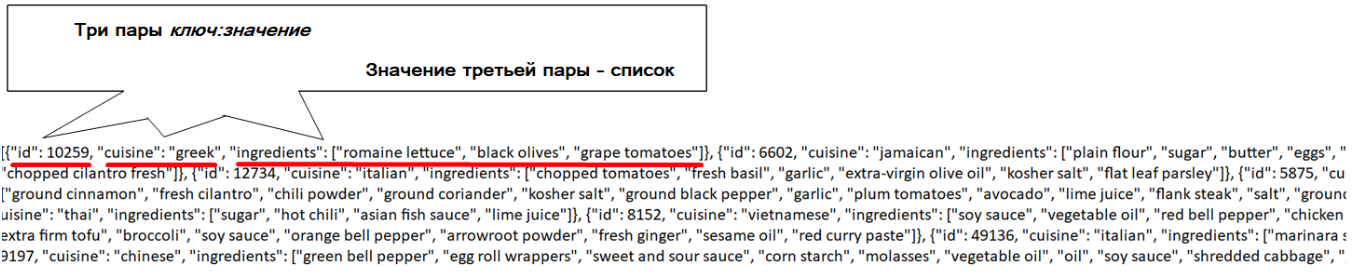

Формат JSON допускает неограниченное количество вложений этих структур друг в друга.

Давайте на примере посмотрим, что это означает. Все упражнения раздела мы будем выполнять на примере файла, содержащего информацию об ингредиентах блюд, относящихся к кухням разных народов.

Мы будем работать с сокращённой версией файла. Скачайте файл, откройте его и посмотрите на содержимое (можно использовать любой текстовый редактор, например Блокнот) . Полный датасет, содержащий более 30 000 записей о блюдах, можно найти и скачать перейдя по ссылке https://www.kaggle.com/c/whats-cooking/data (требуется регистрация). Скопируйте скачанный файл recipes.json в папку, в которой будете работать (в этой же папке вы будете создавать файлы Jupyter Notebook с кодом и запускать код на выполнение).

## 5. JSON. Открываем JSON-файл и извлекаем данные

### ОТКРЫВАЕМ JSON-ФАЙЛ

Чтобы перевести данные из формата JSON в формат, который можно обрабатывать инструментами Python, необходимо выполнить процедуру, которая называется десериализация (декодирование данных). Обратный процесс, связанный с переводом структур данных Python в формат JSON, называется сериализацией.

Для выполнения десериализации мы воспользуемся методом load() (от англ. загрузить) модуля json, который принимает на вход ссылку на открытый JSON-файл:

In [86]:
with open('data/recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes

Отлично! Теперь содержимое нашего файла загружено в переменную recipes. Давайте выведем его на экран с помощью функции pprint() из одноимённого модуля:

In [87]:
pprint(recipes) # Выводим на экран содержимое переменной recipes, используя функция pprint()

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
                  'black olives',
                  'grape tomatoes',
                  'garlic',
                  'pepper',
                  'purple onion',
                  'seasoning',
                  'garbanzo beans',
                  'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
                  'ground pepper',
                  'salt',
                  'tomatoes',
                  'ground black pepper',
                  'thyme',
                  'eggs',
                  'green tomatoes',
                  'yellow corn meal',
                  'milk',
                  'vegetable oil']},
 {'cuisine': 'filipino',
  'id': 20130,
  'ingredients': ['eggs',
                  'pepper',
                  'salt',
                  'mayonaise',
                  'cooking oil',
                  'green chilies',
                  'grilled chicken bre

Итак, мы видим, что рецепт каждого из блюд описан в виде словаря, который состоит из трёх пар "ключ-значение":

* Ключ "cuisine" — обозначает принадлежность блюда к определённой национальной кухне (например, 'greek', 'southern_us', 'filipino' и т. д.);
* Ключ "id" — уникальный идентификационный номер блюда;
* Ключ "ingredients"— содержит перечень продуктов, входящих в состав блюда.  

Все рецепты (то есть все словари) хранятся в одном списке, располагаясь последовательно.

### ИЗВЛЕКАЕМ ДАННЫЕ ИЗ JSON-ФАЙЛА

После того как мы провели десериализацию данных из JSON-файла, мы можем работать с полученным объектом как с обычными списками и словарями. Единственное отличие этой работы от манипуляций с привычными нам списками и словарями заключается в том, что данных теперь больше и они помещены внутрь структуры с большим количеством уровней вложенности.

Давайте выясним некоторые детали о блюде, которое записано первым в списке блюд. Его индекс — 0, и информация о нём хранится в словаре. Чтобы узнать ID этого блюда, мы можем обратиться к соответствующему ключу словаря, выполнив следующий код:

In [88]:
recipes[0]['id']

10259

Здесь мы сначала извлекаем из списка первый элемент (индекс 0). Поскольку каждый элемент списка является словарём, для получения нужной информации о конкретном блюде нам нужно указать ключ словаря. ID блюда доступно по ключу 'id', и мы указываем этот ключ в отдельной паре квадратных скобок:

Аналогичным образом, для получения списка ингредиентов первого блюда в списке мы можем использовать тот же код, заменив в нём ключ 'id' на 'ingredients'. 

### Задание 5.1

Сколько ингредиентов входят в состав первого блюда из предлагаемого списка?

In [89]:
len(recipes[0]['ingredients'])

9

Мы также можем извлечь информацию о конкретном блюде по его ID. Для этого необходимо с помощью цикла, например for, перебрать все элементы списка, проверяя ключ 'id',  и извлечь нужную информацию, когда мы наконец найдем нужное блюдо.

### Задание 5.2

К какой кухне относится блюдо с id = 13121?

In [90]:
for recipe in recipes: # начинаем перебор всех блюд входящих в список
    if recipe['id'] == 13121: # если id текущего блюда равен заданному для поиска
        print(recipe['cuisine']) # выводим на экран наименование кухни, к которой относится блюдо
        break # прерываем выполнение цикла, т.к. нужное блюдо найдено


thai


### Задание 5.3

На практике также иногда возникают задачи по извлечению из JSON-файла обобщённой информации. Давайте попробуем решить две такие задачи.

Какое количество уникальных национальных кухонь присутствуют в нашем наборе данных?

ВАРИАНТ РЕШЕНИЯ С ИСПОЛЬЗОВАНИЕМ СПИСКА

Чтобы извлечь эту информацию, нам нужно создать пустой список и последовательно заполнять его уникальными значениями, доступными по ключу 'cuisine' в каждом из словарей, содержащих информацию о рецептах. Поскольку словари объединены в список recipes, не получится применить известный нам метод unique() (этот метод неприменим к словарям), и для извлечения всех уникальных значений нужно перебирать элементы списка в цикле с параметром.

ВАРИАНТ РЕШЕНИЯ С ИСПОЛЬЗОВАНИЕМ МНОЖЕСТВА

Другой способ решения этой же задачи — использование для хранения данных о разных кухнях не списка, а множества (set). Множество содержит только уникальные элементы, поэтому при работе с ним нет необходимости проверять, содержится ли там тот или иной элемент. Если элемент (в нашем примере — название типа кухни) уже есть, то команда "добавить во множество такое же значение" будет проигнорирована компьютером.

In [91]:
# Используя список        
cuisines = [] # создаём пустой список для хранения уникальных значений кухонь
for recipe in recipes: # начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines): # если тип кухни текущего блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # добавляем его к списку cuisines
len(cuisines) # Выводим на экран полученное значение
            
# Используя множество
cuisines = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    cuisines.add(recipe['cuisine']) # добавляем название типа кухни к множеству
len(cuisines) # Выводим на экран полученное значение

20

### Задание 5.4

Какой из национальных кухонь принадлежит самое большое количество рецептов?

In [92]:
for recipe in recipes: # Начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines): # Если тип кухни текущего блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # Добавляем его к списку cuisines
valreccuisine = {} # Создаём пустой словарь для хранения информации об количествах рецептов в каждой кухне
for item in cuisines: # Перебираем список кухонь
    valreccuisine[item] = 0 # Добавляем в словарь ключ, соответствующий очередной кухне
for recipe in recipes: # Перебираем список рецептов
    valreccuisine[recipe['cuisine']] += 1 # Увеличиваем значение нужного ключа в словаре на 1
            
print(max(valreccuisine, key=valreccuisine.get)) # Извлекаем значения для всех ключей используя метод get(), выбираем самое максимальное значение (при наличии одинаковых значений будет выбрано первое в словаре) и выводим на экран ключ максимального значения

italian


## 6. JSON. Работаем с pandas. Из JSON в pandas

### ИЗ JSON В PANDAS

Как вы помните, после десериализации наши данные были преобразованы в список, элементами которого являются вложенные словари, содержащие по три пары "ключ-значение". 

Поскольку структура всех вложенных словарей одинакова, мы можем создать DataFrame на основе списка, не проводя с ним никаких дополнительных манипуляций:

In [93]:
import json # Импортируем модуль json
from pprint import pprint # Импортируем функцию pprint()
import pandas as pd # Импортируем модуль pandas

with open('data/recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes
df = pd.DataFrame(recipes) # Создаём объект DataFrame из списка recipes
display(df.head()) # Выводим на экран первые строки полученного DataFrame

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


ДОПОЛНИТЕЛЬНО

Для непосредственного считывания содержимого файла recipes.json в переменную df (объект DataFrame) используйте функцию read_json() (с англ. читать_json).

In [94]:
import pandas as pd # Импортируем модуль pandas
df = pd.read_json('data/recipes.json') # Создаём объект DataFrame, загружая содержимое файла recipes.json
display(df.head()) # Выводим на экран первые строки полученного DataFrame

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


Для более подробного ознакомления с функцией  read_json() предлагаем вам обратиться к https://pandas.pydata.org/pandas-docs/version/1.1.3/reference/api/pandas.read_json.html

Итак, получившийся DataFrame содержит информацию о рецептах из нашего JSON-файла. 

Каждая строка соответствует одному рецепту, в столбце id хранится его идентификационный номер, в столбце cuisine — тип кухни, а столбец ingredients содержит список, в котором перечислены ингредиенты, необходимые для приготовления блюда.

Такая структура не очень практична, поскольку она не позволяет осуществлять группировку данных и выполнять многие другие операции, связанные с исследованием ингредиентов разных блюд. Например, представьте, что вы хотите отфильтровать блюда, состоящие не более чем из пяти ингредиентов, или блюда, не содержащие мяса. Сделать это, когда ингредиенты блюд хранятся в списках, не очень просто.

Для полноценной работы с данными нам необходимо иметь возможность хранить информацию о каждом ингредиенте в отдельном столбце, например:

Давайте шаг за шагом преобразуем DataFrame в такой вид.

1. Создадим функцию для заполнения значения в каждой ячейке. Функция будет проверять наличие конкретного ингредиента в столбце ingredients для текущего блюда и возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует.

2. Организуем цикл, в котором будем перебирать наименования всех ингредиентов DataFrame (для этого потребуется создать реестр, то есть некий список, который содержит уникальные наименования ингредиентов). Для каждого ингредиента создадим в DataFrame столбец с соответствующим названием и заполним его единицами и нулями, применив к DataFrame, а точнее к столбцу ingredients функцию, созданную нами на предыдущем этапе.

### Задание 6.4

Создайте реестр уникальных ингредиентов all_ingredients, который будет использоваться на втором этапе. Какое количество уникальных ингредиентов в нашем DataFrame?

In [95]:
all_ingredients=set() # Создаем пустое множество для хранения реестра уникальных ингредиентов
for recipe in recipes: # Начинаем перебор всех блюд входящих в список
    for ingredient in recipe['ingredients']: # Начинаем перебор всех ингредиентов входящих в состав текущего блюда
        all_ingredients.add(ingredient) # Добавляем уникальный ингредиент в реестр
display(len(all_ingredients)) # Выводим на экран количество уникальных ингредиентов из реестра

1318

Теперь определим функцию contains(), с помощью которой мы будем проверять наличие конкретного ингредиента ingredient_name в рецепте текущего блюда, который представлен списком ingredient_list (значение в ячейке столбца ingredients текущего рецепта).

Функция будет возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует.
Отлично! Осталось лишь перебрать все ингредиенты из ранее созданного реестра all_ingredients с помощью цикла  for  и создать в DataFrame столбец с соответствующим названием, заполнив его единицами и нулями. Для этого применим к DataFrame, а точнее, к столбцу ingredients функцию contains().
В завершение изменим значение столбца ingredients — вместо списка ингредиентов в каждом рецепте заполним столбец данными о количестве ингредиентов в нём:

In [96]:
cuisines = [] # Создаём пустой список для хранения уникальных значений кухонь
for recipe in recipes: # Начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines): # Если тип кухни текущего блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # Добавляем его к списку cuisines
valreccuisine = {} # Создаём пустой словарь для хранения информации об количествах рецептов в каждой кухне
for item in cuisines: # Перебираем список кухонь
    valreccuisine[item] = 0 # Добавляем в словарь ключ, соответствующий очередной кухне
for recipe in recipes: # Перебираем список рецептов
    valreccuisine[recipe['cuisine']] += 1 # Увеличиваем значение нужного ключа в словаре на 1
            
print(max(valreccuisine, key=valreccuisine.get)) # Извлекаем значения для всех ключей используя метод get(), выбираем самое максимальное значение (при наличии одинаковых значений будет выбрано первое в словаре) и выводим на экран ключ максимального значения

italian


In [97]:
with open('data/recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes

all_ingredients=set() # Создаем пустое множество для хранения реестра уникальных ингредиентов
for recipe in recipes: # Начинаем перебор всех блюд входящих в список
    for ingredient in recipe['ingredients']: # Начинаем перебор всех ингредиентов входящих в состав текущего блюда
        all_ingredients.add(ingredient ) # Добавляем уникальный ингредиент в реестр
    
df = pd.DataFrame(recipes) # Создаем объект DataFrame из списка recipes

def contains(ingredient_list): # Определяем имя функции и передаваемые аргументы
    if ingredient_name in ingredient_list: # Если ингредиент есть в текущем блюде,
        return 1 # возвращаем значение 1
    else: # Если ингредиента нет в текущем блюде,
        return 0 # возвращаем значение 0
            
for ingredient_name in all_ingredients: # Последовательно перебираем ингредиенты в реестре all_ingredients
    df[ingredient_name] = df['ingredients'].apply(contains) # В DataFrame cоздаем столбец с именем текущего ингредиента и заполняем его единицами и нулями, используя ранее созданную функцию contains

df['ingredients'] = df['ingredients'].apply(len) # Заменяем список ингредиентов в рецепте, на их количество

display(df)

C:\Users\artem.truschelev\AppData\Local\Temp\ipykernel_19224\3054234976.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name] = df['ingredients'].apply(contains) # В DataFrame cоздаем столбец с именем текущего ингредиента и заполняем его единицами и нулями, используя ранее созданную функцию contains
C:\Users\artem.truschelev\AppData\Local\Temp\ipykernel_19224\3054234976.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name] = df['ingredients'].apply(contains) # В DataFrame cоздаем столбец с и

,id,cuisine,ingredients,lemon,margarita mix,corn flour,soba noodles,asparagus,cracked black pepper,pork,...,bean paste,celery,organic sugar,cumin seed,fettuccine pasta,vermicelli noodles,fennel seeds,apricot preserves,low-fat milk,tortillas
0,10259,greek,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1121,chinese,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,18376,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,17815,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,32878,southern_us,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Задание 6.5

Напишите код для создания списка ids всех блюд, представленных в датафрейме. Нужны только уникальные значения.

Порядок id должен совпадать с тем, как они расположены в исходном датафрейме.

Примечание. Не забудьте импортировать библиотеки и прочитать файл recipes.csv.

In [98]:
# import json
# from pprint import pprint

# recipies = []
# ids = [] 
# for recipe in recipes:
#     if not(recipe['ingredients'] in recipies):
#         ids.append(recipe['id'])
#         recipies.append(recipe['ingredients'])

# print(ids)

### СОХРАНЯЕМ DATAFRAME В CSV-ФАЙЛЕ

Если мы планируем продолжать работать с DataFrame, созданными на основе данных, которые мы получили в JSON-формате, то полезно будет сохранить промежуточный DataFrame в виде CSV-файла. Для выполнения этой операции воспользуемся известной нам в Pandas функцией to_csv():

In [99]:
df.to_csv('data/recipes.csv', index = False)

В качестве основного параметра мы указали имя файла, в котором необходимо сохранить данные. Также мы установили значение параметра index как False. Такая настройка позволит нам не сохранять индексы строк в виде отдельного столбца; в результате не будут загружаться «лишние» данные при открытии файла при помощи функции read_csv().

### 7. JSON. Работаем с pandas. Из pandas в JSON

### ИЗ PANDAS В JSON

Решим обратную задачу и создадим JSON-файл из сохранённого ранее CSV-файла, который получили в конце предыдущего этапа. 

Начнём с чтения файла и создания DataFrame на его основе:

In [100]:
df = pd.read_csv('data/recipes.csv') # Создаём DataFrame, читаем данные из файла в переменную df

Теперь, используя только данные из этого файла, нам нужно в точности воссоздать структуру исходного JSON-файла. Мы помним, что после десериализации данные представляли собой список, состоящий из словарей. В каждом словаре хранилась информация о рецепте одного блюда. Каждый словарь состоял из трёх пар "ключ-значение". Первая пара содержала название кухни, к которой относилось блюдо, вторая — id блюда, и третья — список ингредиентов входящих в состав блюда.

Поскольку по условию задачи мы не можем использовать предыдущие наработки, давайте начнём с создания списка, содержащего перечень id всех блюд, а также списка ингредиентов, встречающихся в рецептах. Эти списки в дальнейшем мы будем использовать для заполнения JSON-структуры.

### Задание 7.1

Напишите код для создания списка id всех блюд, нужны только уникальные значения представленных в DataFrame. Результирующий список занесите в переменную ids.

In [101]:
df

,id,cuisine,ingredients,lemon,margarita mix,corn flour,soba noodles,asparagus,cracked black pepper,pork,...,bean paste,celery,organic sugar,cumin seed,fettuccine pasta,vermicelli noodles,fennel seeds,apricot preserves,low-fat milk,tortillas
0,10259,greek,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1121,chinese,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,18376,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,17815,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,32878,southern_us,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
ids = list(df['id'].unique())

### Задание 7.2

Напишите код для создания списка ингредиентов всех блюд, представленных в DataFrame. Результирующий список занесите в переменную ingredients.

In [103]:
ingredients=list(df.columns)[3:]

In [104]:
ingredients

['lemon',
 'margarita mix',
 'corn flour',
 'soba noodles',
 'asparagus',
 'cracked black pepper',
 'pork',
 'coconut',
 'shredded coconut',
 'chicken',
 'Madeira',
 'lime',
 'condensed cheddar cheese soup',
 'fontina',
 'chopped pecans',
 'hoagie rolls',
 'corn starch',
 'vegetable shortening',
 'black olives',
 'sesame salt',
 'navy beans',
 'italian style rolls',
 'dashi kombu',
 'lettuce leaves',
 'tamarind',
 'diced tomatoes',
 'crawfish',
 'pepperoni',
 'safflower oil',
 'chopped cilantro',
 'seasoned bread crumbs',
 'salmon fillets',
 'genoa salami',
 'orange zest',
 'frozen peas',
 'whole kernel corn, drain',
 'bacon drippings',
 'leaves',
 'cilantro leaves',
 'chili sauce',
 'apple cider vinegar',
 'cucumber',
 'half & half',
 'fresh salmon',
 'clove',
 'ground turkey',
 'Mexican cheese',
 'whole nutmegs',
 'chunky salsa',
 'granulated sugar',
 'Corn Flakes Cereal',
 'greek yogurt',
 'pickles',
 'semolina',
 'flour tortillas',
 'erythritol',
 'ground red pepper',
 'light brown

Отлично! Теперь мы можем использовать подготовленные списки ids и ingredients для непосредственного создания JSON-структуры.

После десериализации JSON-файла мы получили структуру, представляющую собой список, состоящий из словарей. Каждый словарь состоял из трёх пар "ключ-значение", при этом в качестве значений выступали:

* целое число (id блюда);
* строковая величина (тип кухни);
* список строковых величин (перечень ингредиентов).

Сейчас нам предстоит воссоздать эту структуру, извлекая данные из DataFrame. Для этого необходимо создать:

* пустой список new_recipes — для хранения итоговой структуры;
* используя код из Задачи 7.1, список ids — для хранения id всех блюд;
* используя код из Задачи 7.2, список ingredients — для хранения названий всех ингредиентов.

Далее необходимо реализовать следующий алгоритм:

1. Написать код функции make_list(), которая принимает на вход строку DataFrame df, содержащую полные данные об одном блюде, и возвращает перечень ингредиентов, входящих в состав этого блюда в виде списка.
2. Организовать цикл с параметром, в котором будут перебираться элементы списка ids. В результате в процессе прохождения цикла параметр должен принять значение id каждого блюда.
3. На каждом шаге цикла создать словарь, содержащий три пары "ключ-значение":
ключу "id" присвоить текущее значение параметра цикла как целого числа;
ключу "cuisine" присвоить значение соответствующей кухни, которое мы получим, применив фильтр по текущему id к DataFrame df;
ключу "ingredients" присвоить значение списка, воспользовавшись функцией make_list(), созданной на первом шаге алгоритма.
4. Каждый созданный словарь добавить к списку new_recipes:

new_recipes = [] # Создаём пустой список для хранения итоговой структуры
for current_id in ids: # Организуем цикл с параметром current_id  
    cuisine = df[df['id'] == current_id]['cuisine'].iloc[0] # Получаем значение соответствующей кухни, применив фильтр по текущему значению параметра цикла к DataFrame;  
    current_ingredients = make_list(df[df['id'] == current_id]) # Получаем перечень ингредиентов, входящих в состав текущего блюда  
    current_recipe = {'cuisine': cuisine, 'id': int(current_id), 'ingredients': current_ingredients} # Создаём текущий словарь  
    new_recipes.append(current_recipe) # Добавляем созданный словарь к списку  

In [105]:
import pandas as pd
df = pd.read_csv('recipes.csv')
ids = list(df['id'].unique())
ingredients = list(df.columns)[3:]

def make_list(row):
    ingredient_list=[]
    for ingredient in ingredients:
        if row[ingredient].item()==1:
            ingredient_list.append(ingredient)
    return ingredient_list

In [106]:
new_recipes = [] # Создаём пустой список для хранения итоговой структуры
for current_id in ids: # Организуем цикл с параметром current_id
    cuisine = df[df['id'] == current_id]['cuisine'].iloc[0] # Получаем значение соответствующей кухни, применив фильтр по текущему значению параметра цикла к DataFrame;
    current_ingredients = make_list(df[df['id'] == current_id]) # Получаем перечень ингредиентов, входящих в состав текущего блюда
    current_recipe = {'cuisine': cuisine, 'id': int(current_id), 'ingredients': current_ingredients} # Создаём текущий словарь
    new_recipes.append(current_recipe) # Добавляем созданный словарь к списку

Выполним сериализацию списка new_recipes и запишем полученные данные в файл.

Для сериализации  используем функцию dumps(), которой в качестве параметра передадим список new_recipes. Запись в файл осуществляется с помощью метода write(). Предварительно файл необходимо открыть для записи с помощью функции open() c параметром 'w' (от англ. write, рус. писать):

In [107]:
import json # Импорт модуля json
new_recipes = json.dumps(new_recipes) # Функция dumps() модуля json сериализирует объект Python в строку формата JSON. 
with open("data/new_recipes.json", "w") as write_file: # Откроем файл new_recipes.json для записи
    write_file.write(new_recipes) # Записываем содержимое подготовленные данные в файл

Итак, задача по созданию JSON-файла из сохранённого ранее CSV-файла решена!

## 8. XML. Что это?

Аббревиатура XML расшифровывается как eXtensible Markup Language — расширяемый язык разметки. Он (язык) позволяет описывать документы, используя теги.

Если вы когда-нибудь сталкивались с HTML, языком разметки для создания веб-страниц, то можете заметить, что XML очень похож на него. Однако в отличие от HTML, где теги заранее чётко заданы, в XML мы можем задавать теги сами.

Например, если мы хотим описать меню в ресторане в формате XML-документа, мы можем сделать это так:

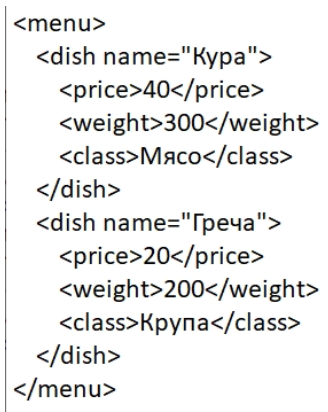

В примере выше довольно жёсткая структура: у нас есть меню  — тег menu, где хранятся объекты, то есть конкретные блюда, помеченные тегом dish. У каждого из блюд есть параметр name, в котором прописано имя блюда. Можно считать, что dish — класс этого объекта.

Внутри каждого объекта-блюда находится набор значений, которые тоже задаются тегами. Например, внутри тега price находится значение 20, означающее цену данного блюда. Тег price и другие теги внутри можно рассматривать как атрибуты класса dish.

Файлы XML не всегда имеют жёсткую структуру и не обязаны её иметь, но чаще всего какая-то структура внутри файла будет. Почему? Потому что обычно XML не пишут вручную. Такие файлы генерируются кодом и читаются тоже кодом. Поэтому при наличии понятной структуры обработка файла становится намного проще.

## 9. XML. Контент XML-файла

### ИЗВЛЕКАЕМ КОНТЕНТ ИЗ XML-ФАЙЛА

Данные в формате XML имеют древовидную структуру. 

Что такое дерево? Это структура, которая имеет узлы и связи между ними. Самый верхнеуровневый узел называется корнем, а всё, что находится в самом низу, называется листьями. 

В примере из прошлого юнита корнем является menu, а листьями, например, price и weight.

Кроме того, у menu есть дети (потомки) — это два узла dish, имеющие разное значение атрибута name.

Таким образом, в файле используется набор тегов, внутри которых могут находиться другие теги со своими значениями.

Для работы с XML-файлами мы будем использовать модуль ElementTree , входящий в стандартный пакет xml. Этот модуль позволит нам «перемещаться» по дереву XML и смотреть, что находится в каждом его узле, начиная с корня и заканчивая листьями.

Импортируем этот модуль под псевдонимом ET: 

In [108]:
import xml.etree.ElementTree as ET # Импортируем модуль ElementTree

Мы будем работать с представленной выше структурой XML-файла. Скачайте файл, откройте его и посмотрите на содержимое (можно использовать любой текстовый редактор, например Блокнот). Скопируйте скачанный файл menu.xml в папку, в которой будете работать (в этой же папке вы будете создавать файлы Jupyter Notebook с кодом и запускать код на выполнение).

Для работы со структурой файла menu.xml считаем его содержимое в переменную tree, выполнив код:

In [110]:
import xml.etree.ElementTree as ET # Импортируем модуль ElementTree
tree = ET.parse('data/menu.xml')

### КОРЕНЬ

Запишем в переменную root корневой узел дерева tree и посмотрим, как выглядит содержимое переменной root, для чего выполним код:

In [111]:
root = tree.getroot()
display(root)

<Element 'menu' at 0x0000019E8E7104A0>

Мы видим, что в корне находится 'menu'. Всё правильно, мы и предполагали увидеть именно это. 

Какой тип у этого объекта? Если мы вызовем встроенный в Python метод type() и передадим ему root , то увидим, что это тип xml.etree.ElementTree.Element. Такой тип будет у любого узла в дереве.

In [112]:
display(type(root))

xml.etree.ElementTree.Element

### ПОТОМКИ

Для того чтобы посмотреть список потомков корневого узла, выполним следующий код:

In [113]:
display(list(root))

[<Element 'dish' at 0x0000019E8E731580>,
 <Element 'dish' at 0x0000019E8E7A9210>]

Если у узла нет потомков, то вернётся пустой список — [].

Итак, использование list(root) возвращает список потомков указанного узла. У узла root, который представляет меню, два потомка, а именно — два блюда, которые представлены тегами dish.

Для того чтобы получить список потомков второго блюда в нашем меню и вывести его на экран, выполним код:

In [114]:
display(list(root[1]))

[<Element 'price' at 0x0000019E8E7ABBA0>,
 <Element 'weight' at 0x0000019E8E7AB470>,
 <Element 'class' at 0x0000019E8E7A87C0>]

Таким образом, у второго потомка узла root —  три потомка.

### АТРИБУТЫ И ТЕГИ

Как было сказано ранее, у узлов могут быть параметры, или атрибуты. Например, у узлов dish есть атрибут name, который хранит название блюда.

Мы можем непосредственно обратиться к атрибутам, используя attrib.

Выведем на экран атрибуты первого блюда из меню:

In [115]:
display(root[0].attrib)

{'name': 'Кура'}

В XML-узлах часто хранятся количественные показатели. Эти показатели хранятся в виде текста, и прочитать их можно, обратившись к атрибуту text у соответствующего объекта типа ElementTree.Element.

Например, возьмём узел price первого блюда из меню:

In [116]:
display(root[0][0])

<Element 'price' at 0x0000019E8E7ABC40>

Теперь прочитаем значение этого узла с помощью text:

In [117]:
display(root[0][0].text)

'40'

Все значения в XML, даже числовые, хранятся как строки, поэтому преобразовывать их к нужному типу вам нужно самим.

Например, в данном случае можно обернуть значение стоимости в int() или float().

Если вы хотите прочитать наименование тега конкретного узла, необходимо использовать tag. Например, получим наименование тега корневого узла:

In [118]:
display(root.tag)

'menu'

In [119]:
display(root[0][2].tag)

'class'

### ИСПОЛЬЗОВАНИЕ ЦИКЛОВ

Итак, мы научились обращаться к отдельным узлам дерева, представляющего XML-структуру, и извлекать информацию о его атрибутах, значении и потомках.

На этом шаге мы решим задачу вывода на экран наименование всех блюд из меню, а также информацию о них (иными словами, нам необходимо обойти дерево и вывести на экран значения его листьев).

Используя цикл for, автоматизируем обход дерева. Для этого напишем следующий код:

In [120]:
for dish in root:
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()

Кура price 40
Кура weight 300
Кура class Мясо

Греча price 20
Греча weight 200
Греча class Крупа



В этом коде реализован следующий алгоритм:

1. В первом (внешнем) цикле перебираем потомков корня дерева (root). Потомки перебираются последовательно при помощи переменной dish. Это отдельные блюда из меню.
2. Во втором (вложенном) цикле аналогичным образом перебираем потомков каждого блюда. Этими потомками являются параметры блюда — его цена (price), вес (weight) и класс (class).
3. После этого выводим на экран название блюда (значение атрибута name), название очередного параметра (tag) и его значение (text).
Дополнительная функция print() в цикле верхнего уровня предназначена для организации более удобного восприятия информации — между отдельными блюдами будет выведена пустая строка.

## 10. XML. Загружаем, создаем, сохраняем

### ЗАГРУЖАЕМ ДАННЫЕ ИЗ XML-ФАЙЛА В DATAFRAME

Реализуем следующий алгоритм:

1. Загрузить XML-структуру файла menu.xml в переменную root.
2. Создать пустой список df_list (в него будем добавлять строчки итоговой таблицы).
3. Заранее создать список column_names с именами столбцов — название блюда (name), его цена (price), вес (weight) и класс (class).
4. В цикле организовать обход xml-дерева из корня по всем потомкам.
5. На каждой итерации цикла сформировать в виде списка строку таблицы, содержащую информацию: наименование блюда (атрибут name узла dish) и значения потомков этого узла — узлов price, weight, class.
6. Добавить сформированную строку в список df_list, используя метод append().
7. Сформировать из вложенного списка DataFrame. Имена для столбцов взять из списка column_names.

Код, который реализует этот алгоритм:

In [122]:
import xml.etree.ElementTree as ET
tree = ET.parse('data/menu.xml')
root = tree.getroot()

import pandas as pd
column_names = ['name', 'price', 'weight', 'class']
df_list = []

for dish in root:
    row = [dish.attrib['name'], dish[0].text, dish[1].text, dish[2].text]
    df_list.append(row)
    df = pd.DataFrame(df_list, columns=column_names)
display(df)

,name,price,weight,class
0,Кура,40,300,Мясо
1,Греча,20,200,Крупа


### СОЗДАЁМ XML-ФАЙЛ

Воссоздадим структуру нашего исходного XML-файла с нуля,  руководствуясь общими рекомендациями.

Чтобы создать корень дерева, используем метод Element() из класса ElementTree:

In [124]:
import xml.etree.ElementTree as ET

new_root = ET.Element('menu')
display(new_root)

<Element 'menu' at 0x0000019E8E713420>

Теперь мы можем добавлять новые узлы в наше дерево, используя метод SubElement() из того же класса.

Добавим в наше меню двух потомков корневого узла, которые будут представлять два блюда, то есть будут узлами dish:

In [125]:
dish1 = ET.SubElement(new_root, 'dish', name='Кура')
dish2 = ET.SubElement(new_root, 'dish', name='Греча')
display(list(new_root))

[<Element 'dish' at 0x0000019E909C6840>,
 <Element 'dish' at 0x0000019E909C7600>]

В метод SubElement() мы передали первым аргументом узел, к которому добавляем потомка, вторым аргументом — наименование нового тега (dish),  третьим аргументом — наименование атрибута нового узла( name ) и его значение.

Аналогичным образом можно добавлять новые узлы к любым существующим узлам, не только к корню.

Добавим в создаваемую структуру по три потомка (атрибута) к двум новым узлам, которые будут содержать информацию о блюде — о его цене (price), весе (weight) и классе (class), а также значение этих атрибутов:

In [126]:
price1 = ET.SubElement(dish1, "price").text = "40"
weight1 = ET.SubElement(dish1, "weight").text = "300"
class1 = ET.SubElement(dish1, "class").text = "Мясо"
display(list(dish1))

price2 = ET.SubElement(dish2, "price").text = "20"
weight2 = ET.SubElement(dish2, "weight").text = "200"
class2 = ET.SubElement(dish2, "class").text = "Крупа"
display(list(dish2))

[<Element 'price' at 0x0000019E8E78BF60>,
 <Element 'weight' at 0x0000019E8E78AAC0>,
 <Element 'class' at 0x0000019E909C6F70>]

[<Element 'price' at 0x0000019E8E712B10>,
 <Element 'weight' at 0x0000019E8E7336A0>,
 <Element 'class' at 0x0000019E909C7920>]

Проверим визуально корректность созданной нами структуры, выполнив фрагмент кода, разработанного ранее:

In [127]:
for dish in new_root:
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()

Кура price 40
Кура weight 300
Кура class Мясо

Греча price 20
Греча weight 200
Греча class Крупа



Созданная нами структура полностью идентична структуре исходного XML-файла.

### СОХРАНЕНИЕ XML-ФАЙЛА

В финале работы с файлом XML-формата запишем созданную нами структуру как XML-файл на диск.

Преобразуем созданный нами объект типа ElementTree.Element в строку c помощью метода tostring(), передав наше новое дерево как аргумент. Сохраним эту строку на диске, используя стандартные средства Python:

In [129]:
new_root_string = ET.tostring(new_root)
with open("data/new_menu.xml", "wb") as f:
    f.write(new_root_string)

Файл записан! Откройте его и посмотрите, что получилось.

Возможно, вы увидите проблему, связанную с кодировкой. Что делать в этом случае? Как вариант — записать файл, используя сам класс ElementTree() :

In [131]:
ET.ElementTree(new_root).write('data/new_menu_good.xml', encoding="utf-8")

Для этого мы передаём в класс ElementTree() наше дерево (не его строковое представление) и вызываем метод write(). В метод мы передаём путь к новому файлу и нужную нам кодировку.